## Cleaning of Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
##working on hospital dataset
dataset=pd.read_csv('D:\project\hospital.csv')
print("Shape:", dataset.shape)
print(dataset.columns.tolist())
display(dataset) 
def clean_colnames(dataset):
    dataset = dataset.copy()
    dataset.columns = (
        dataset.columns.str.strip()
                  .str.lower()
                  .str.replace(r"\s+", "_", regex=True)
                  .str.replace(r"[^\w_]", "", regex=True)
    )
    return dataset
dataset = clean_colnames(dataset)
print(dataset.columns.tolist())
dataset.info()            
missing = dataset.isna().mean().sort_values(ascending=False)
print(missing[missing > 0].head(20)) 
dup_count = dataset.duplicated().sum()
print("Duplicate rows:", dup_count)



<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Vanya\AppData\Local\Temp\ipykernel_21220\4201347179.py:7: SyntaxWarning: invalid escape sequence '\p'
  dataset=pd.read_csv('D:\project\hospital.csv')


Shape: (36, 11)
['State/UT/Division', ' Number of Rural Hospitals (Govt.)', ' Number of beds in Rural Hospitals (Govt.)', 'Number of Urban Hospitals (Govt.)', 'Number of beds in Urban Hospitals (Govt.)', 'Number of Total Hospitals (Govt.)', 'Number of beds in Total Hospitals (Govt.)', 'Provisional/ Projected Population as on reference period in (000)', 'Average Population Served Per Govt. Hospital', 'Average Population Served Per Govt. Hospital Bed', 'Reference Period']


,State/UT/Division,Number of Rural Hospitals (Govt.),Number of beds in Rural Hospitals (Govt.),Number of Urban Hospitals (Govt.),Number of beds in Urban Hospitals (Govt.),Number of Total Hospitals (Govt.),Number of beds in Total Hospitals (Govt.),Provisional/ Projected Population as on reference period in (000),Average Population Served Per Govt. Hospital,Average Population Served Per Govt. Hospital Bed,Reference Period
0,India,26604,362996,8812.0,1013017.0,35416,1376013,1209924,34163,879,01/01/2013
1,Andhra Pradesh,308,10370,152.0,27591.0,460,37961,84666,184056,2230,01/01/2013
2,Arunachal Pradesh,382,4660,2.0,350.0,384,5010,1184,3083,236,01/01/2013
3,Assam,985,6414,35.0,3765.0,1020,10179,31167,30556,3062,01/01/2013
4,Bihar,565,5442,106.0,7789.0,671,13231,103805,154701,7846,01/01/2013
5,Chhattisgarh,1903,5842,120.0,4928.0,2023,10770,21365,10561,1984,01/01/2013
6,Goa,8,1800,3.0,710.0,11,2510,1458,132545,581,01/01/2013
7,Gujarat,1476,18062,77.0,17408.0,1553,35470,61914,39868,1746,01/01/2013
8,Haryana,61,1212,93.0,6667.0,154,7879,24597,159721,3122,01/01/2010
9,Himachal Pradesh,98,2911,53.0,5574.0,151,8485,6856,45404,808,01/01/2013


['stateutdivision', 'number_of_rural_hospitals_govt', 'number_of_beds_in_rural_hospitals_govt', 'number_of_urban_hospitals_govt', 'number_of_beds_in_urban_hospitals_govt', 'number_of_total_hospitals_govt', 'number_of_beds_in_total_hospitals_govt', 'provisional_projected_population_as_on_reference_period_in_000', 'average_population_served_per_govt_hospital', 'average_population_served_per_govt_hospital_bed', 'reference_period']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   stateutdivision                                                 36 non-null     object 
 1   number_of_rural_hospitals_govt                                  36 non-null     int64  
 2   number_of_beds_in_rural_hospitals_govt                          36 non-null     int64  


In [4]:
##Similarly doing it for Education and population dataset

edu = pd.read_csv("D:/project/education.csv")
pop = pd.read_csv("D:/project/population.csv")

print("Education dataset shape:", edu.shape)
print("Population dataset shape:", pop.shape)
edu.columns = edu.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)
pop.columns = pop.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

print("Education columns:", edu.columns.tolist())
print("Population columns:", pop.columns.tolist())
print(edu.head())
print(pop.head())

edu.rename(columns={'india_state_ut': 'state_ut'}, inplace=True)
edu = edu[edu['india/state/ut'].str.lower() != 'india']
pop = pop[pop['india/state/ut'].str.lower() != 'india']
merged = pd.merge(edu, pop, on='india/state/ut', how='inner')
print("Merged shape:", merged.shape)
merged.head()


Education dataset shape: (37, 7)
Population dataset shape: (37, 20)
Education columns: ['sl._no.', 'india/state/ut', 'total', 'primary', 'upper_primary', 'secondary', 'higher_secondary']
Population columns: ['sl._no.', 'india/state/ut', 'projected_population_by_age_group_-_overall_-_age_3-5_-_boys', 'projected_population_by_age_group_-_overall_-_age_3-5_-_girls', 'projected_population_by_age_group_-_overall_-_age_3-5_-_total', 'projected_population_by_age_group_-_overall_-_age_6-10_-_boys', 'projected_population_by_age_group_-_overall_-_age_6-10_-_girls', 'projected_population_by_age_group_-_overall_-_age_6-10_-_total', 'projected_population_by_age_group_-_overall_-_age_11-13_-_boys', 'projected_population_by_age_group_-_overall_-_age_11-13_-_girls', 'projected_population_by_age_group_-_overall_-_age_11-13_-_total', 'projected_population_by_age_group_-_overall_-_age_6-13_-_boys', 'projected_population_by_age_group_-_overall_-_age_6-13_-_girls', 'projected_population_by_age_group_-_over

,sl._no._x,india/state/ut,total,primary,upper_primary,secondary,higher_secondary,sl._no._y,projected_population_by_age_group_-_overall_-_age_3-5_-_boys,projected_population_by_age_group_-_overall_-_age_3-5_-_girls,...,projected_population_by_age_group_-_overall_-_age_11-13_-_total,projected_population_by_age_group_-_overall_-_age_6-13_-_boys,projected_population_by_age_group_-_overall_-_age_6-13_-_girls,projected_population_by_age_group_-_overall_-_age_6-13_-_total,projected_population_by_age_group_-_overall_-_age_14-15_-_boys,projected_population_by_age_group_-_overall_-_age_14-15_-_girls,projected_population_by_age_group_-_overall_-_age_14-15_-_total,projected_population_by_age_group_-_overall_-_age_16-17_-_boys,projected_population_by_age_group_-_overall_-_age_16-17_-_girls,projected_population_by_age_group_-_overall_-_age_16-17_-_total
0,2,Andaman and Nicobar Islands,412,209,79,54,70,2,9111,8982,...,18099,23603,22124,45728,6591,5894,12485,6606,5614,12220
1,3,Andhra Pradesh,61373,37751,8274,11586,3762,3,919401,849561,...,2194957,2996878,2766690,5763568,775995,731433,1507428,798058,756503,1554560
2,4,Arunachal Pradesh,3490,1695,1283,331,181,4,44130,41520,...,87163,108539,103986,212525,32460,31517,63977,31627,30880,62507
3,5,Assam,56630,37481,9441,7073,2635,5,816835,753831,...,1883526,2524569,2337554,4862123,659613,629985,1289598,674745,649299,1324043
4,6,Bihar,94686,41660,40443,1933,10650,6,5231361,4712572,...,8258312,11322818,10404522,21727340,2820196,2660363,5480559,2816032,2669483,5485516


## Visualisation for Hospital Data

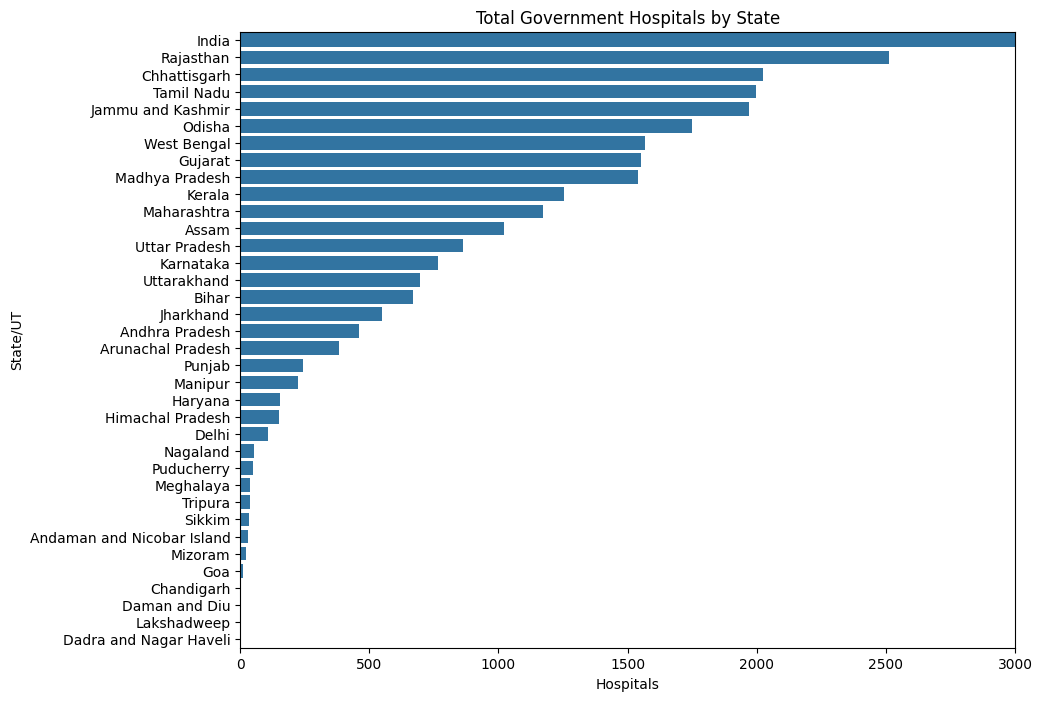

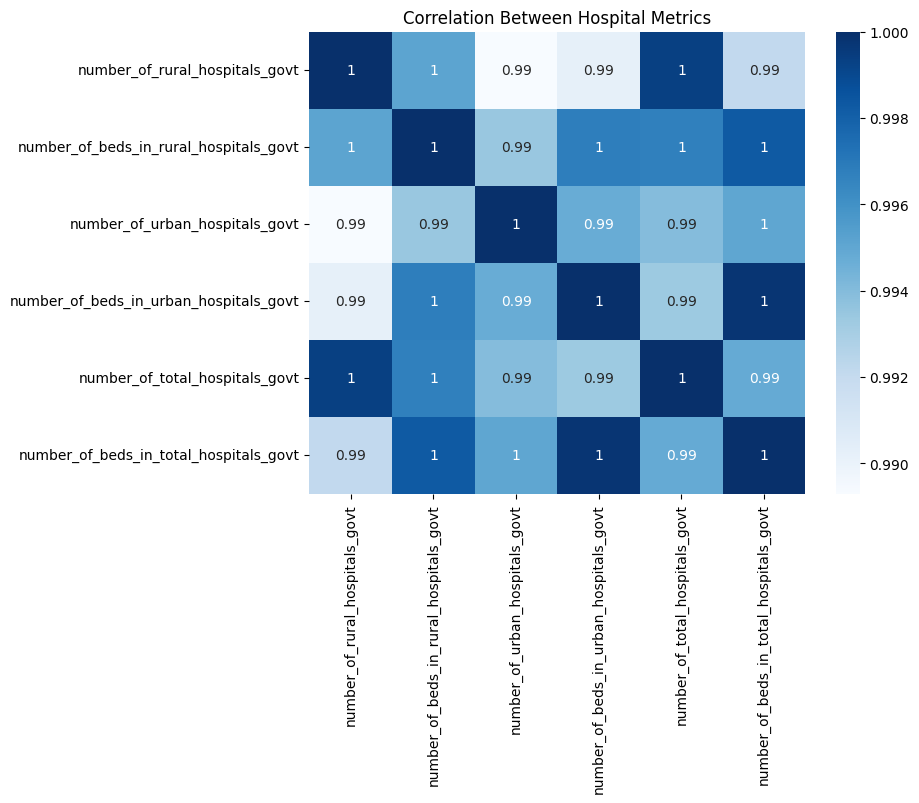

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data=dataset.sort_values('number_of_total_hospitals_govt', ascending=False),
            x='number_of_total_hospitals_govt', y='stateutdivision')
plt.xlim(0,3000)
plt.title('Total Government Hospitals by State')
plt.xlabel('Hospitals')
plt.ylabel('State/UT')
plt.show()
numeric_cols = ['number_of_rural_hospitals_govt', 'number_of_beds_in_rural_hospitals_govt', 'number_of_urban_hospitals_govt', 
                'number_of_beds_in_urban_hospitals_govt', 'number_of_total_hospitals_govt', 'number_of_beds_in_total_hospitals_govt']

corr = dataset[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Between Hospital Metrics")
plt.show()

## Visualisation for Education vs Population Data

C:\Users\Vanya\AppData\Local\Temp\ipykernel_21220\3058814231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu.sort_values('total', ascending=False),


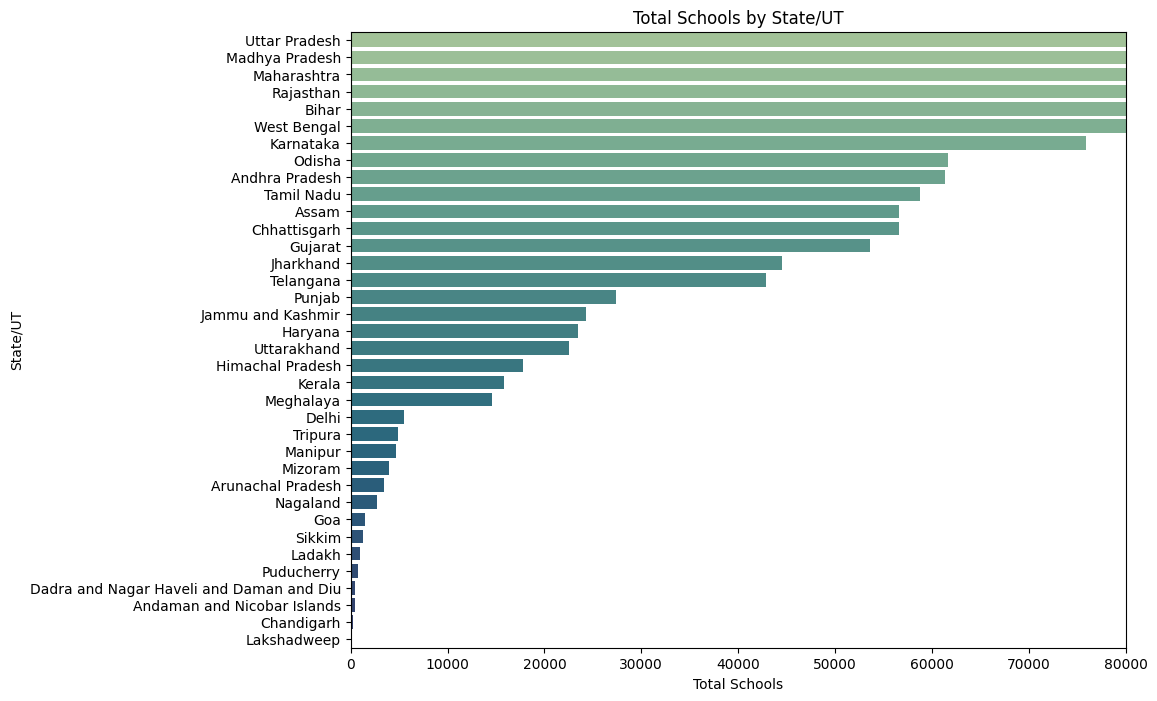

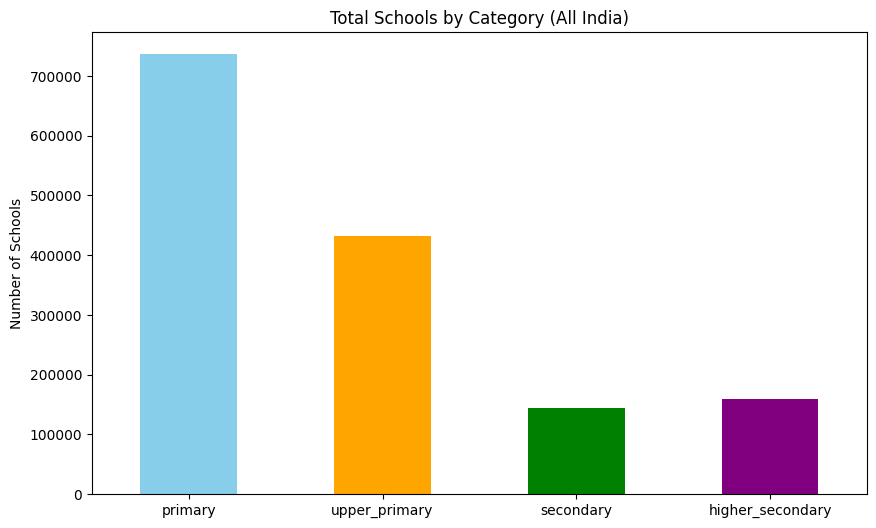

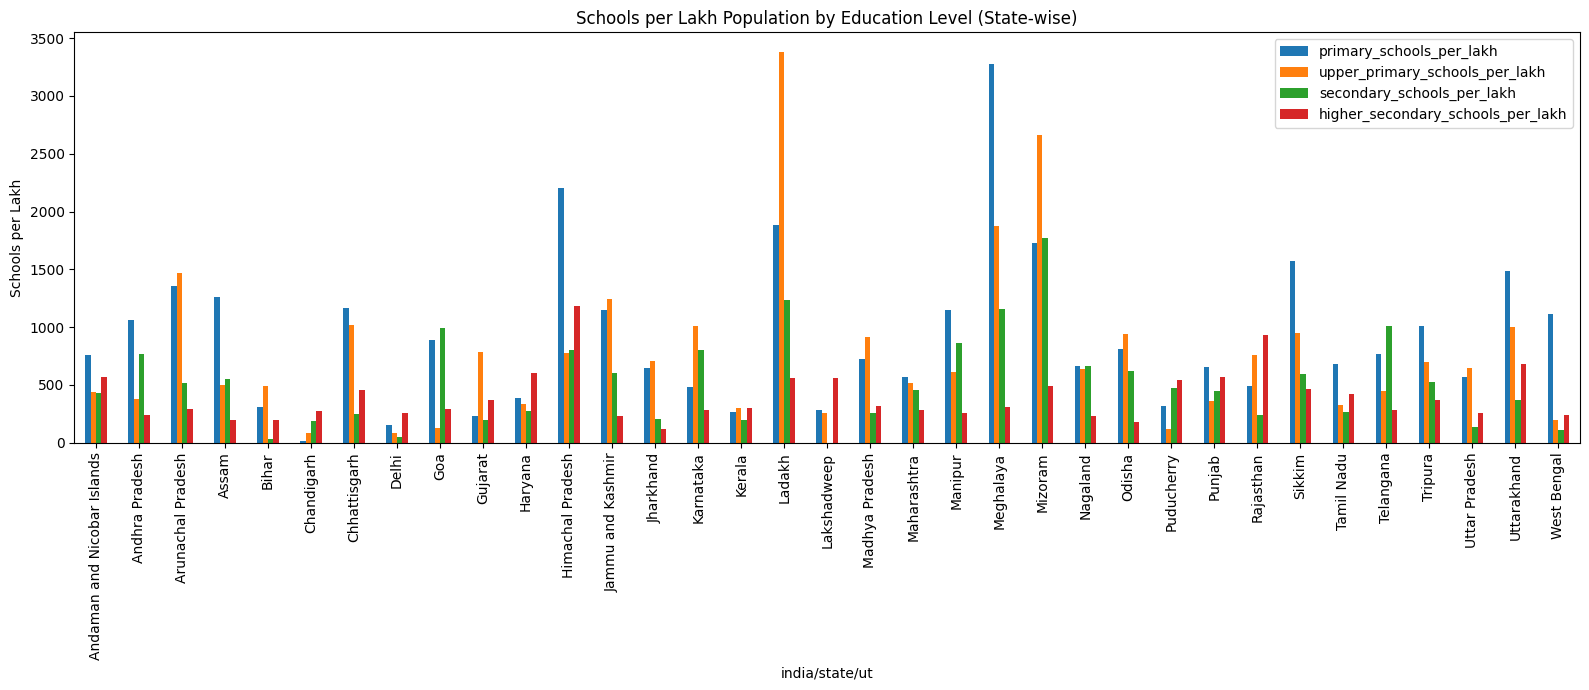

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(data=edu.sort_values('total', ascending=False), 
            x='total', y='india/state/ut', palette='crest')
plt.xlim(0, 80000)  
plt.title('Total Schools by State/UT')
plt.xlabel('Total Schools')
plt.ylabel('State/UT')
plt.show()
plt.figure(figsize=(10,6))
category_sums = edu[['primary', 'upper_primary', 'secondary', 'higher_secondary']].sum()
category_sums.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Total Schools by Category (All India)')
plt.ylabel('Number of Schools')
plt.xticks(rotation=0)
plt.show()

merged['primary_schools_per_lakh'] = (merged['primary'] / merged['projected_population_by_age_group_-_overall_-_age_6-10_-_total']) * 100000
merged['upper_primary_schools_per_lakh'] = (merged['upper_primary'] / merged['projected_population_by_age_group_-_overall_-_age_11-13_-_total']) * 100000
merged['secondary_schools_per_lakh'] = (merged['secondary'] / merged['projected_population_by_age_group_-_overall_-_age_14-15_-_total']) * 100000
merged['higher_secondary_schools_per_lakh'] = (merged['higher_secondary'] / merged['projected_population_by_age_group_-_overall_-_age_16-17_-_total']) * 100000

merged['schools_per_lakh_population'] = (
    merged['primary_schools_per_lakh'] +
    merged['upper_primary_schools_per_lakh'] +
    merged['secondary_schools_per_lakh'] +
    merged['higher_secondary_schools_per_lakh']
)
merged.plot(
    x='india/state/ut',
    y=[
        'primary_schools_per_lakh',
        'upper_primary_schools_per_lakh',
        'secondary_schools_per_lakh',
        'higher_secondary_schools_per_lakh'
    ],
    kind='bar',
    figsize=(16,7)
)
plt.title('Schools per Lakh Population by Education Level (State-wise)')
plt.ylabel('Schools per Lakh')
plt.tight_layout()
plt.show()

## Combining the three datasets for Visualisation of Hospitals And Education statewise


Final merged shape: (32, 32)


C:\Users\Vanya\AppData\Local\Temp\ipykernel_21220\3225629779.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=90, fontsize=11)


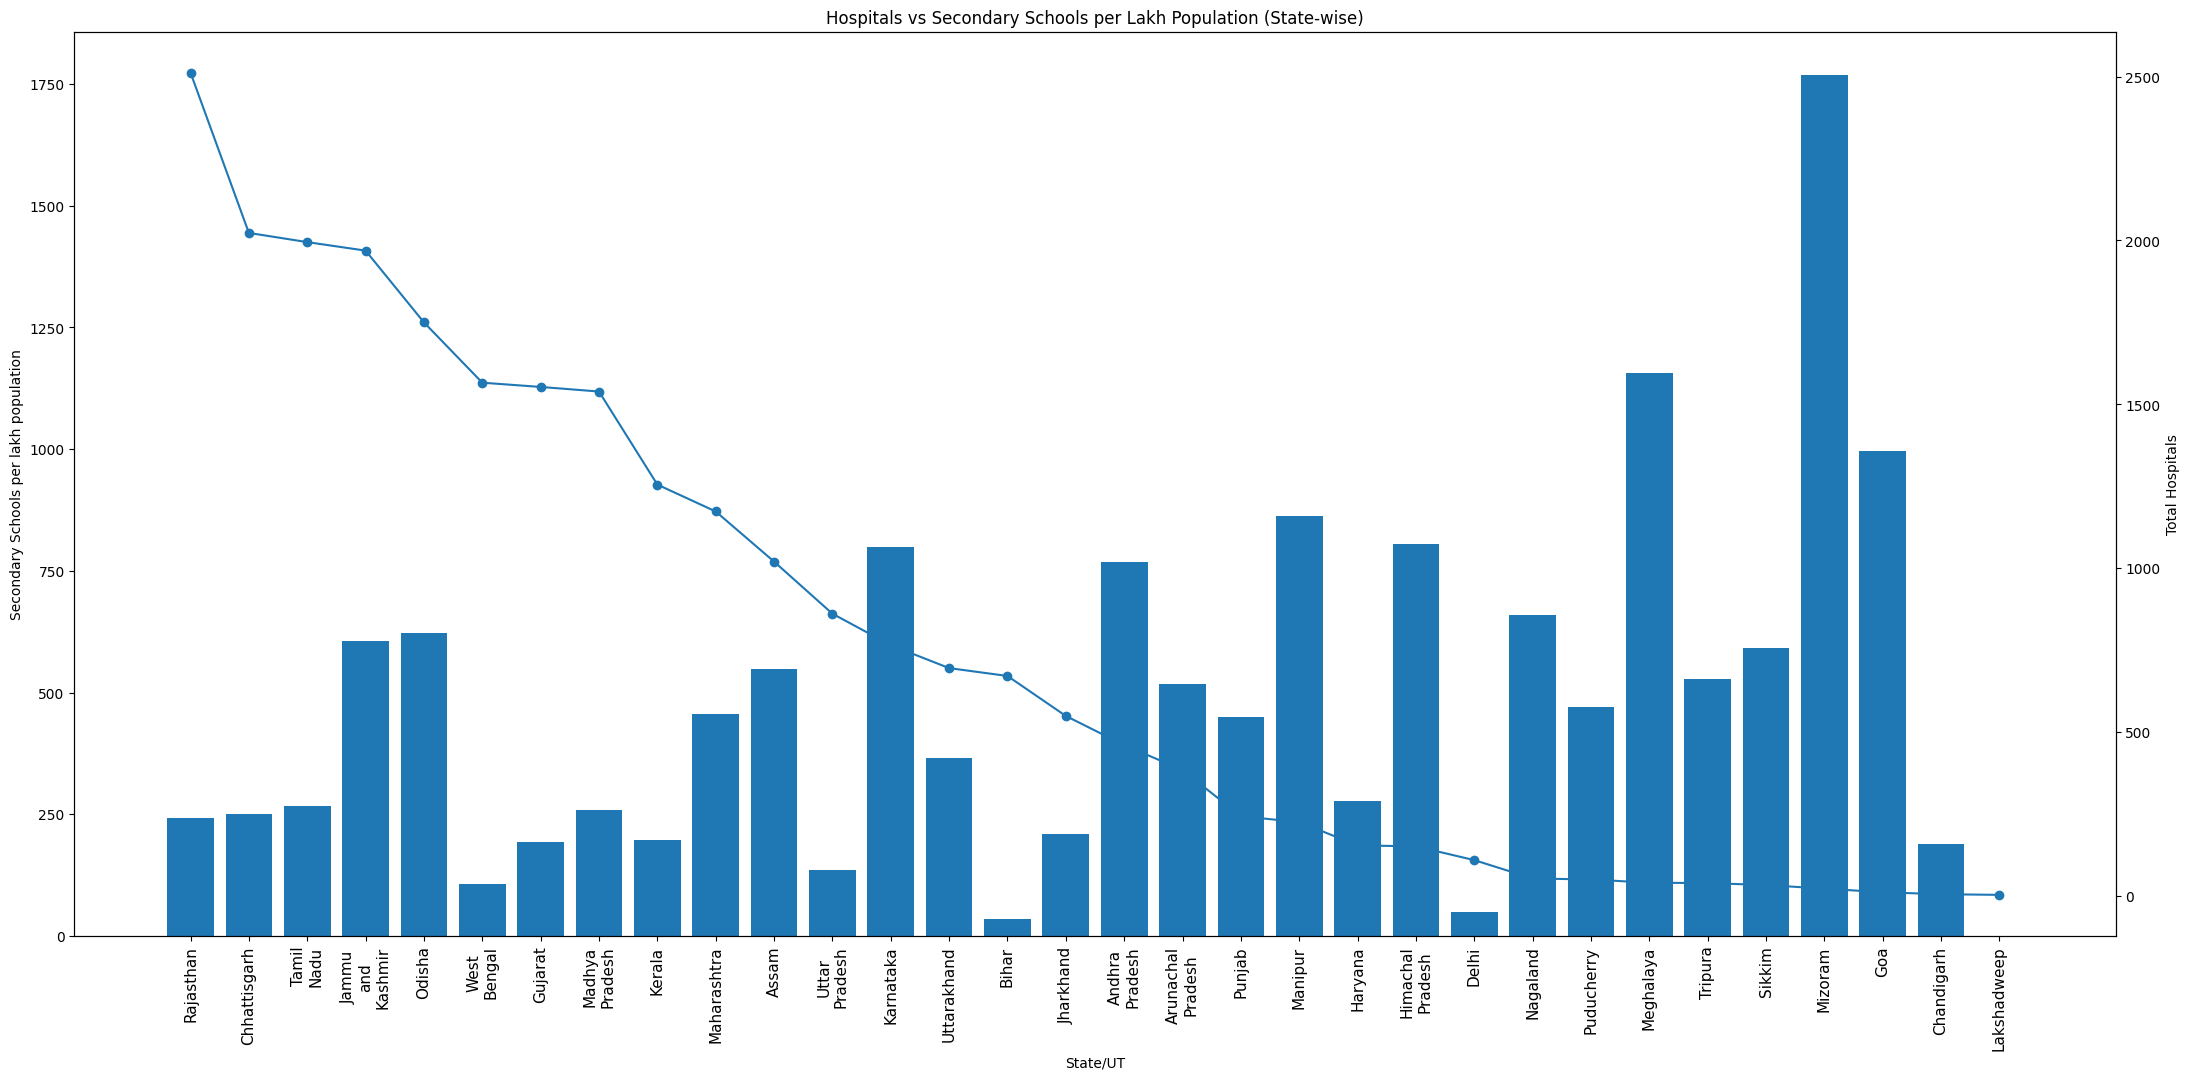

In [36]:
dataset.rename(columns={'stateutdivision': 'india/state/ut'}, inplace=True)


hospital_cols = ['india/state/ut', 'number_of_total_hospitals_govt']
hospital_clean = dataset[hospital_cols]


final = pd.merge(merged, hospital_clean, on='india/state/ut', how='inner')

print("Final merged shape:", final.shape)
final.head()
final = final.sort_values('number_of_total_hospitals_govt', ascending=False)

fig, ax1 = plt.subplots(figsize=(22,10))


ax1.bar(final['india/state/ut'], final['secondary_schools_per_lakh'])
ax1.set_xlabel("State/UT")
ax1.set_ylabel("Secondary Schools per lakh population")


ax2 = ax1.twinx()
ax2.plot(final['india/state/ut'], final['number_of_total_hospitals_govt'], marker='o')
ax2.set_ylabel("Total Hospitals")

plt.title("Hospitals vs Secondary Schools per Lakh Population (State-wise)")
plt.xticks(rotation=30 , ha='right', fontsize=5)
plt.tight_layout()
labels = final['india/state/ut']
labels = ['\n'.join(l.split()) for l in labels]  
ax1.set_xticklabels(labels, rotation=90, fontsize=11)

plt.show()

## Using Plotly for interactive charts


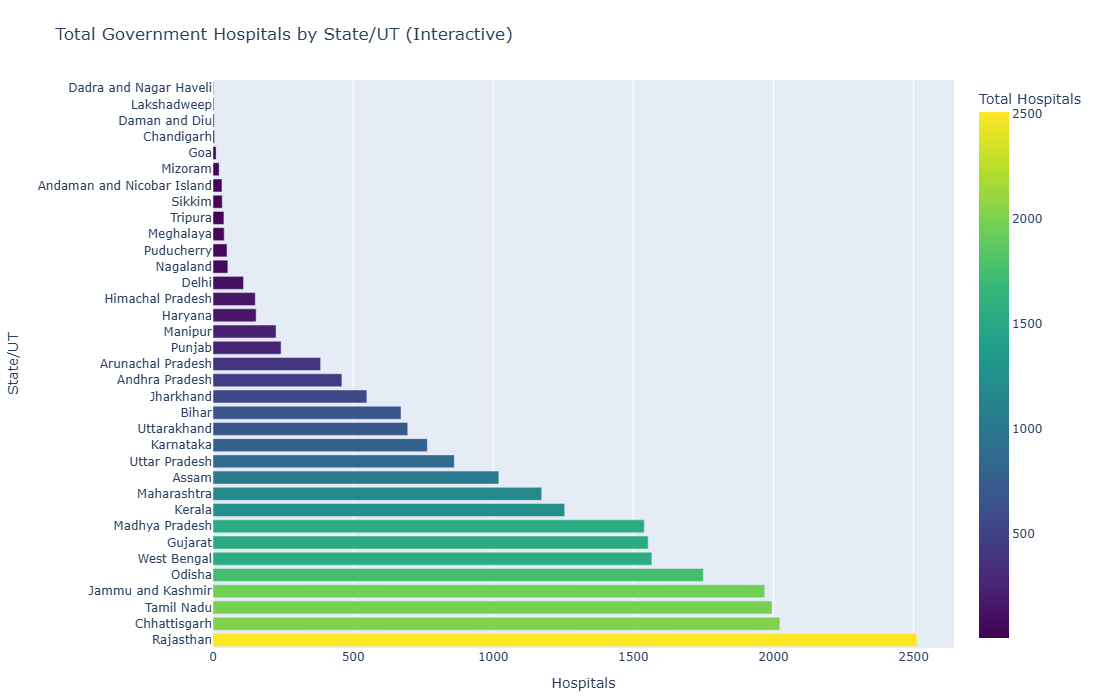

In [45]:
import plotly.express as px
dataset = dataset[dataset['india/state/ut'].str.lower() != 'india'] ## as it creates an outlier
dataset = dataset.sort_values('number_of_total_hospitals_govt', ascending=False)
fig = px.bar(
    dataset,
    x='number_of_total_hospitals_govt',
    y='india/state/ut',
    orientation='h',  # horizontal bars
    title='Total Government Hospitals by State/UT (Interactive)',
    labels={'number_of_total_hospitals_govt': 'Total Hospitals', 'stateutdivision': 'State/UT'},
    color='number_of_total_hospitals_govt',
    color_continuous_scale='Viridis',
    hover_data=['number_of_rural_hospitals_govt', 'number_of_urban_hospitals_govt', 'number_of_beds_in_total_hospitals_govt']
)
fig.update_layout(
    xaxis_title='Hospitals',
    yaxis_title='State/UT',
    height=700,
    margin=dict(l=120, r=50, t=80, b=50)
)
fig.show()

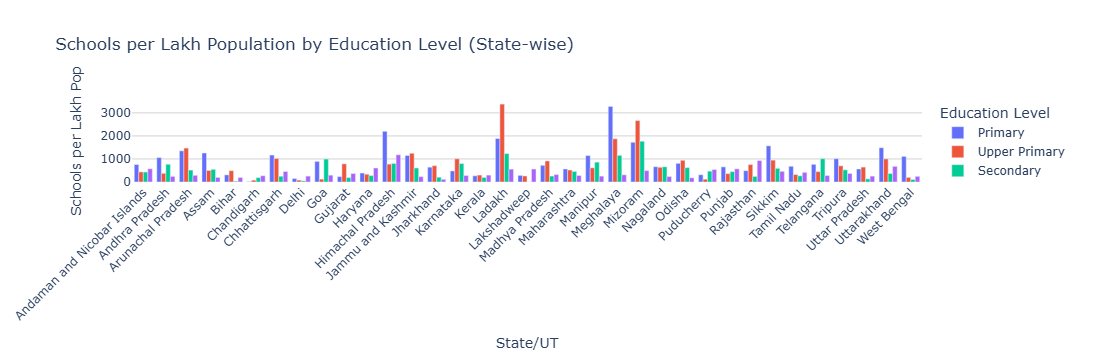

In [49]:
melted = merged.melt(
    id_vars=['india/state/ut'],
    value_vars=[
        'primary_schools_per_lakh',
        'upper_primary_schools_per_lakh',
        'secondary_schools_per_lakh',
        'higher_secondary_schools_per_lakh'
    ],
    var_name='education_level',
    value_name='schools_per_lakh'
)


melted['education_level'] = melted['education_level'].replace({
    'primary_schools_per_lakh': 'Primary',
    'upper_primary_schools_per_lakh': 'Upper Primary',
    'secondary_schools_per_lakh': 'Secondary',
    'higher_secondary_schools_per_lakh': 'Higher Secondary'
})

fig = px.bar(
    melted,
    x='india/state/ut',
    y='schools_per_lakh',
    color='education_level',
    barmode='group',
    title='Schools per Lakh Population by Education Level (State-wise)',
    labels={'india/state/ut': 'State/UT', 'schools_per_lakh': 'Schools per Lakh Pop'},
    hover_name='india/state/ut',hover_data={'schools_per_lakh': ':.2f'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    legend_title_text='Education Level'
)

fig.show()

